In [1]:
from waggon.utils import display
from waggon.surrogates import DGP
from waggon.acquisitions import EI
from waggon import functions as f
from waggon.optim import SurrogateOptimiser

Optimisation started...:   0%|          | 0/100 [00:00<?, ?it/s]

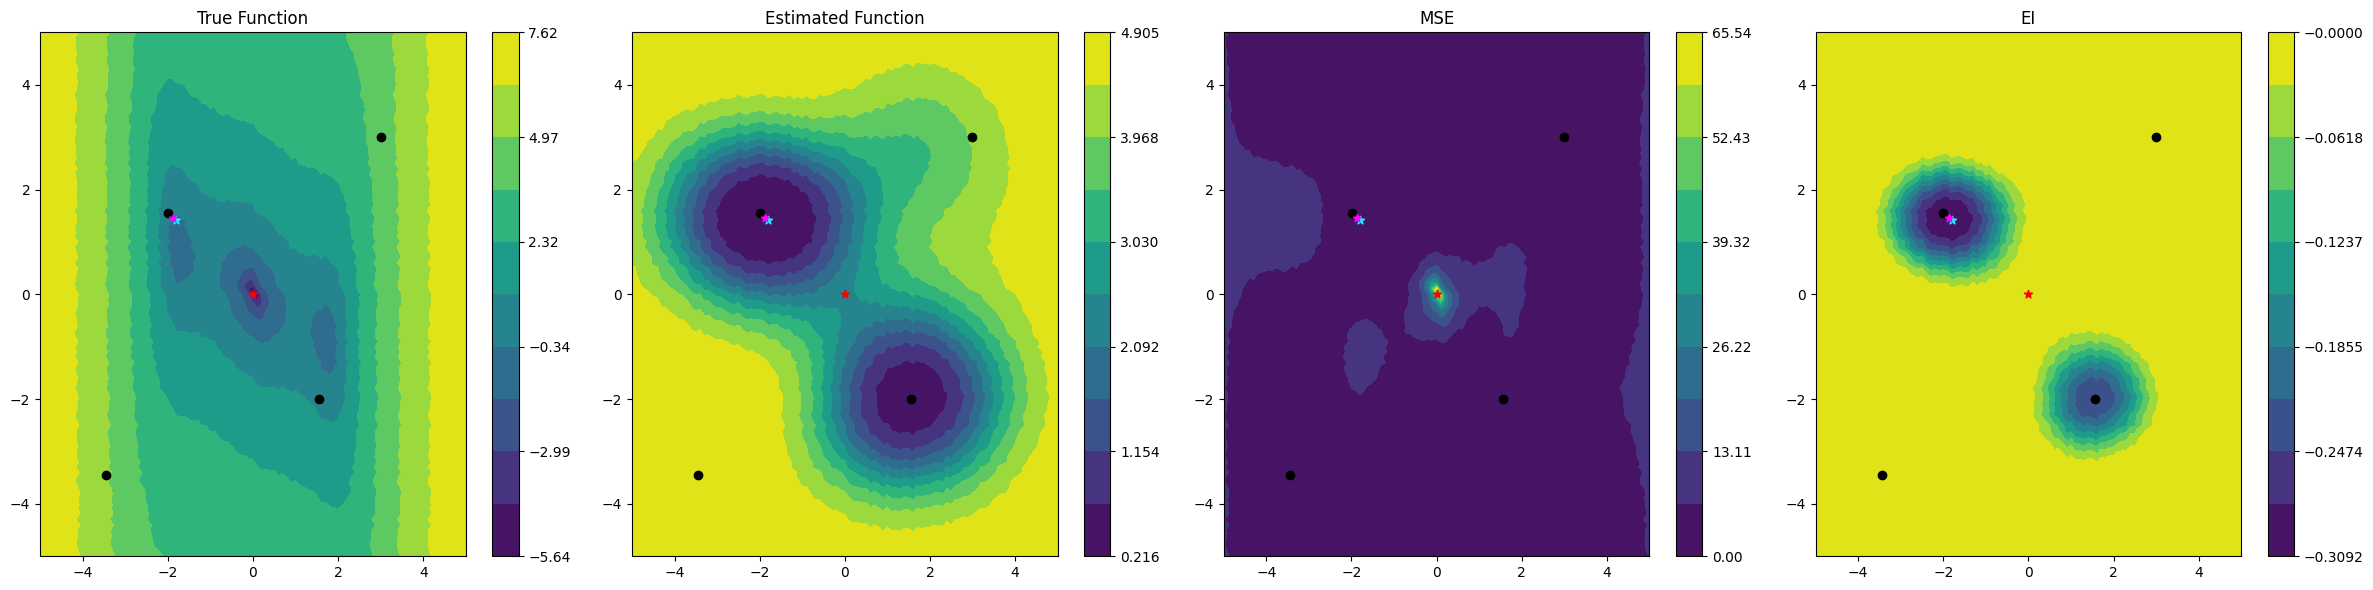

Optimisation error: 17.8773:   1%|          | 1/100 [00:27<44:54, 27.22s/it]

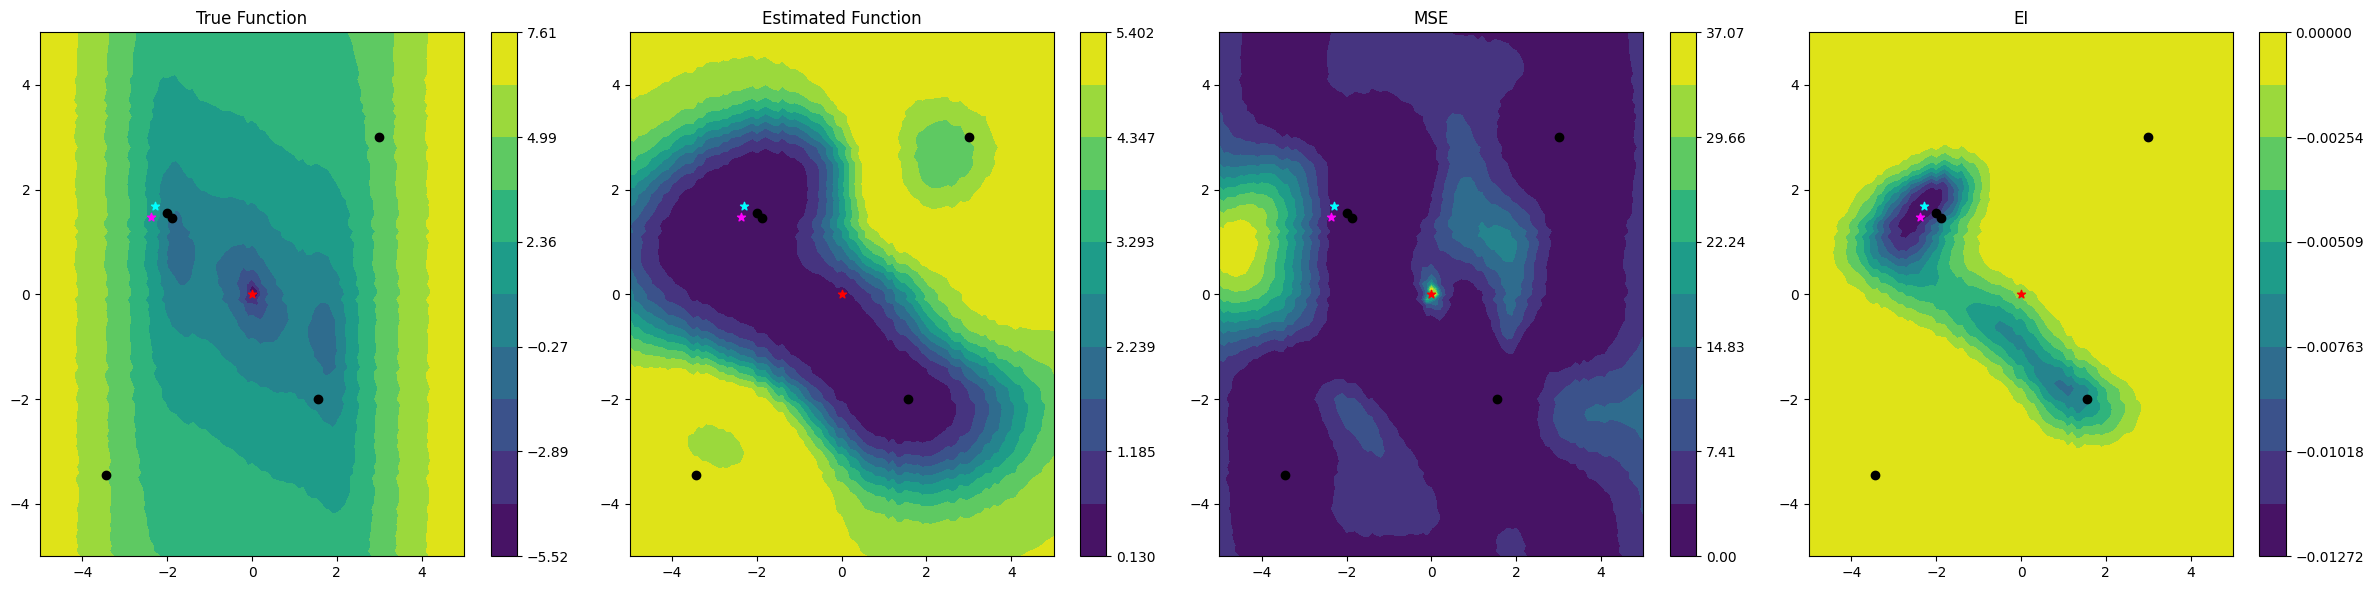

Optimisation error: 17.8773:   2%|▏         | 2/100 [00:52<42:57, 26.30s/it]

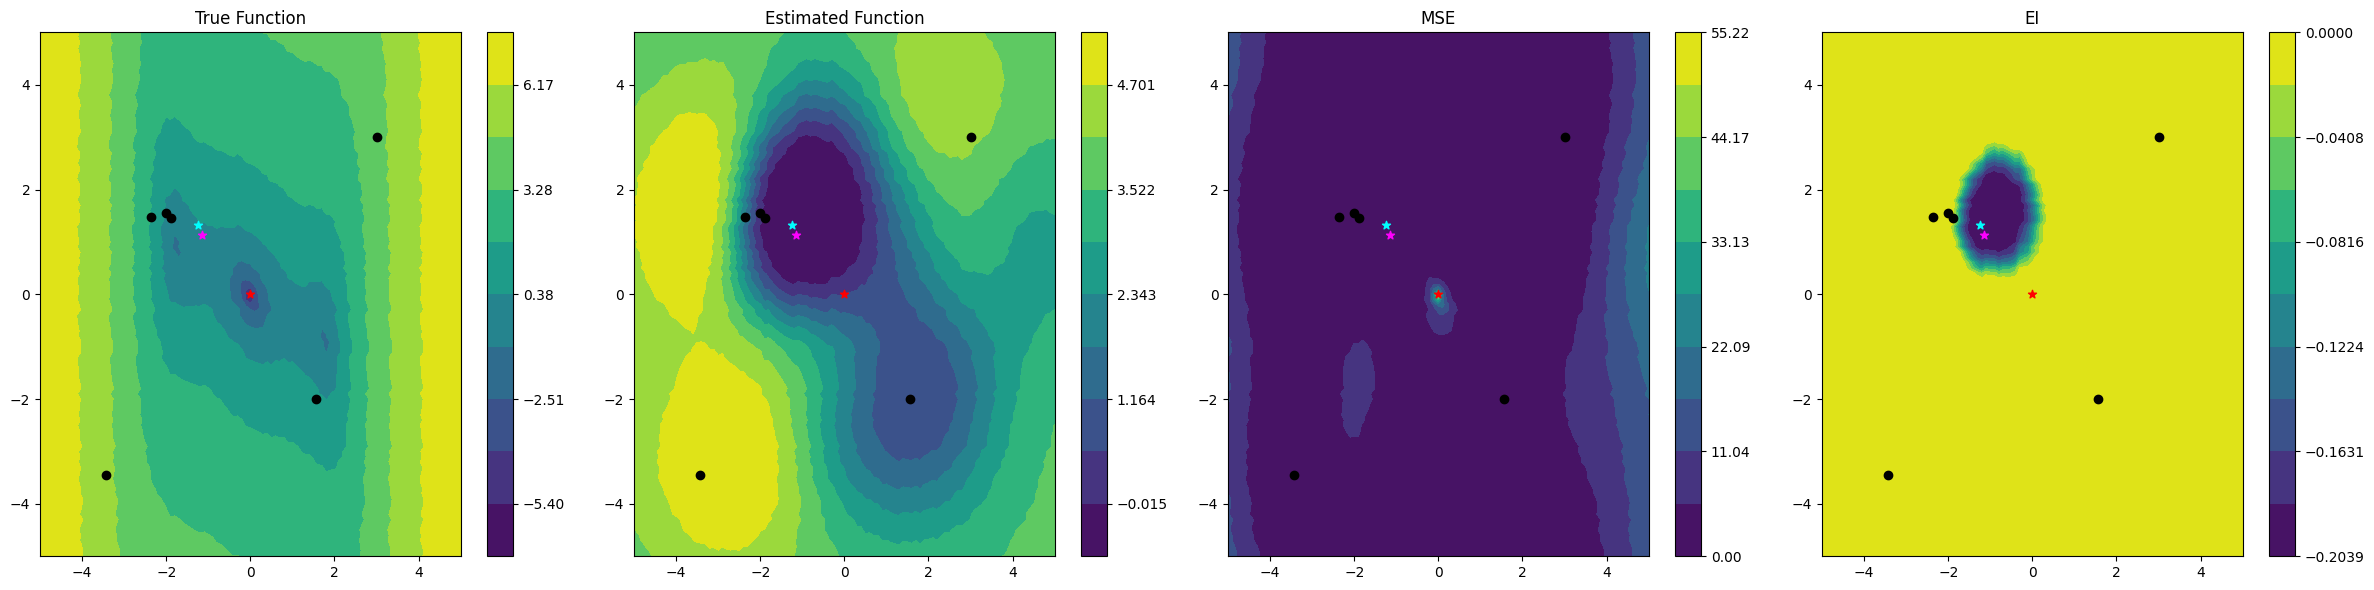

Optimisation error: 17.8773:   3%|▎         | 3/100 [01:24<46:31, 28.78s/it]

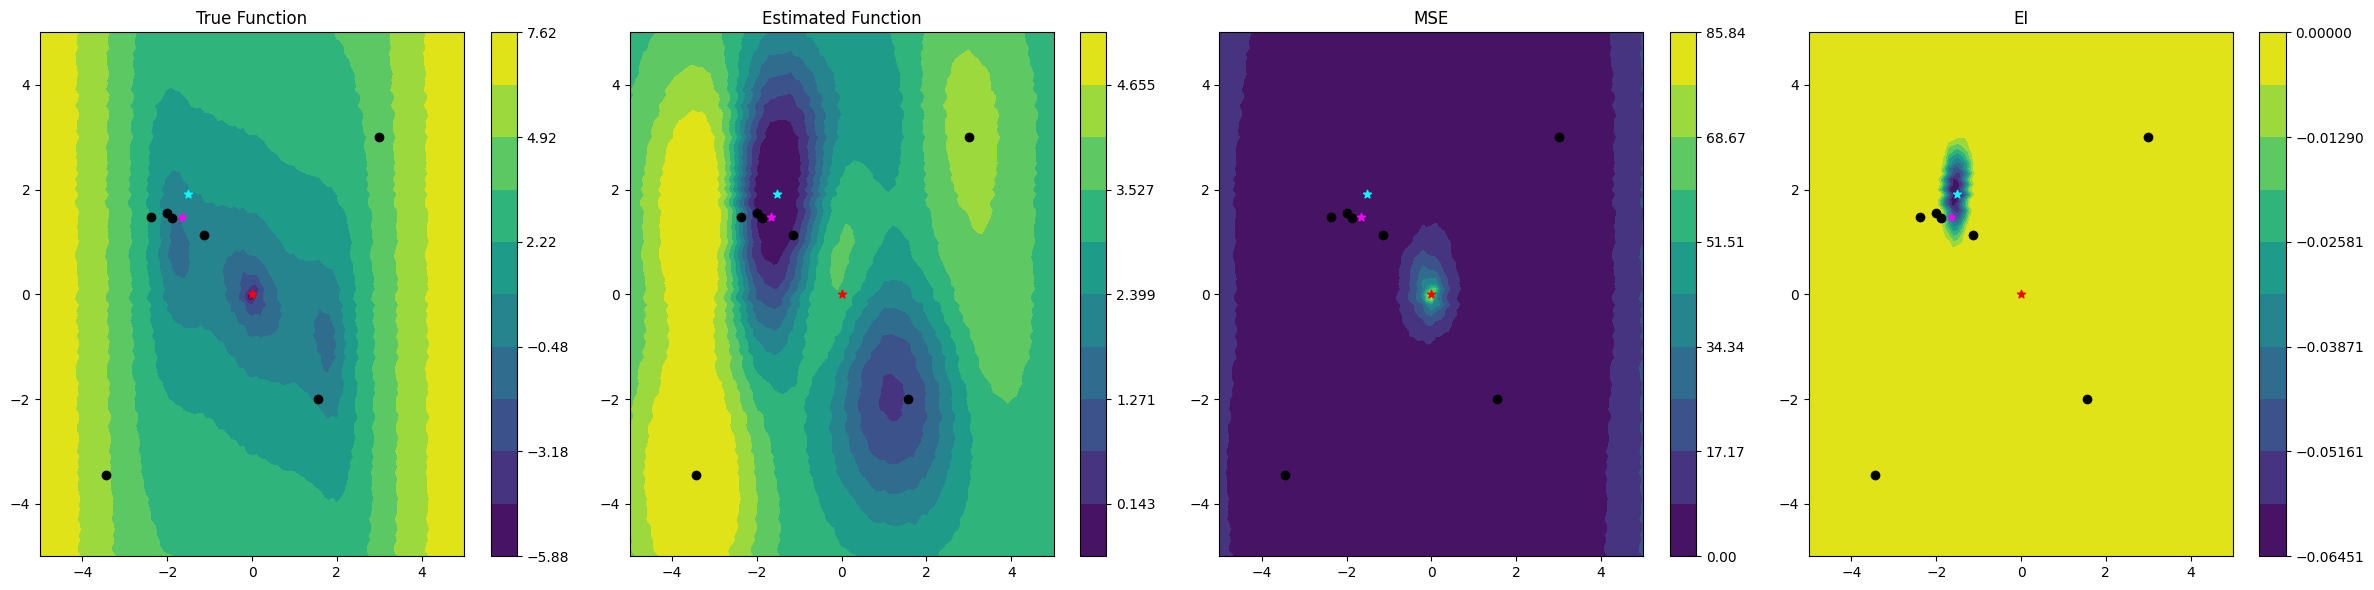

Optimisation error: 17.8773:   4%|▍         | 4/100 [01:43<40:06, 25.07s/it]

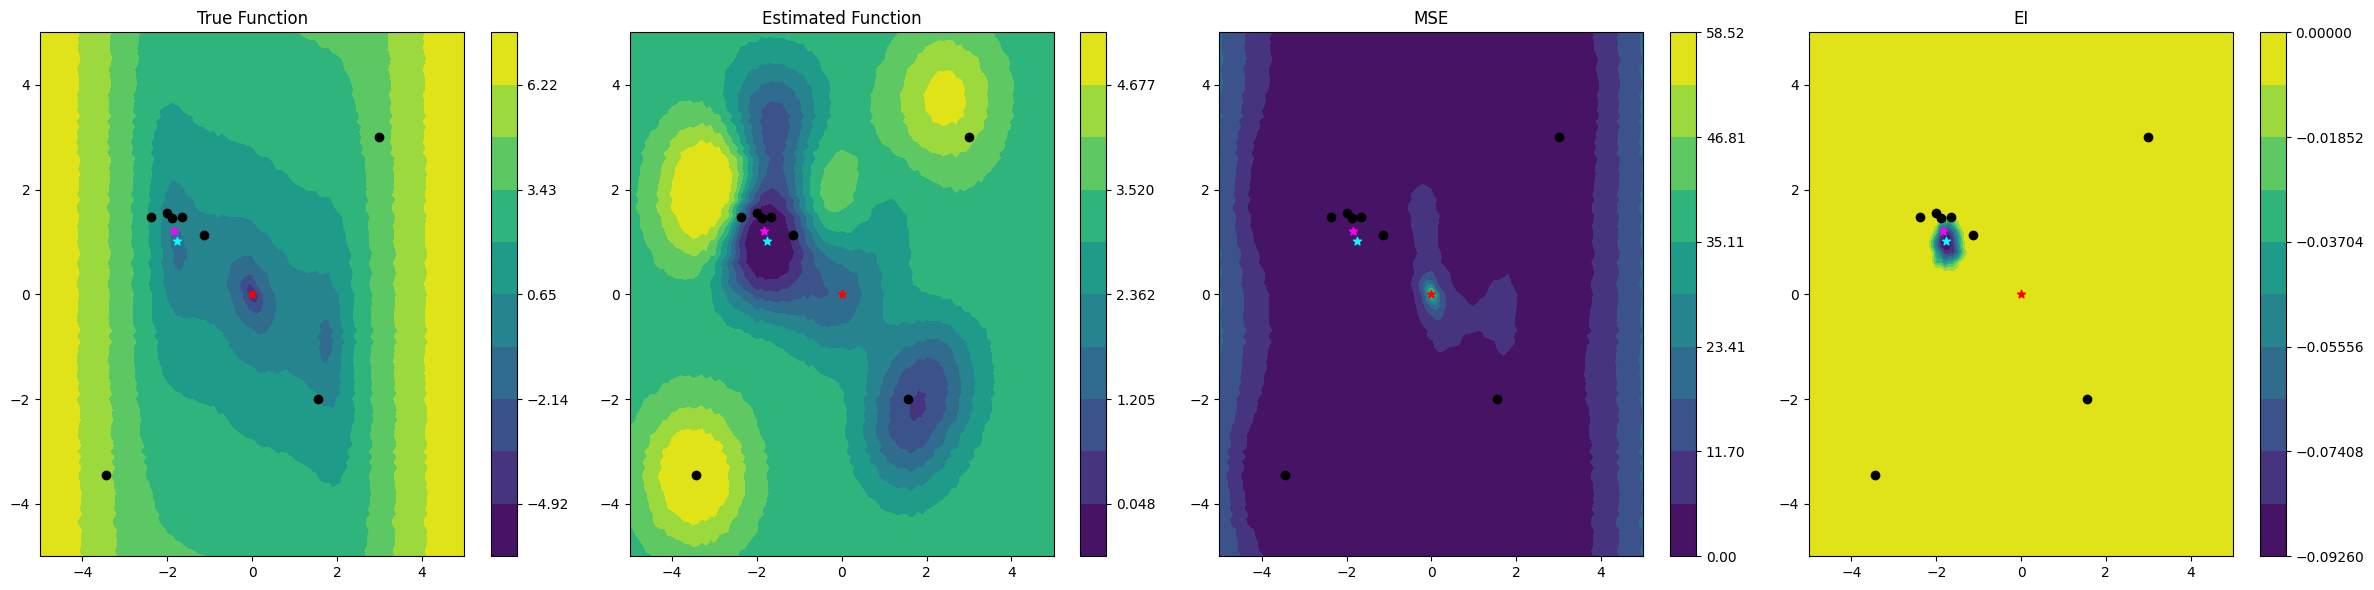

Optimisation error: 17.4942:   5%|▌         | 5/100 [02:03<36:21, 22.96s/it]

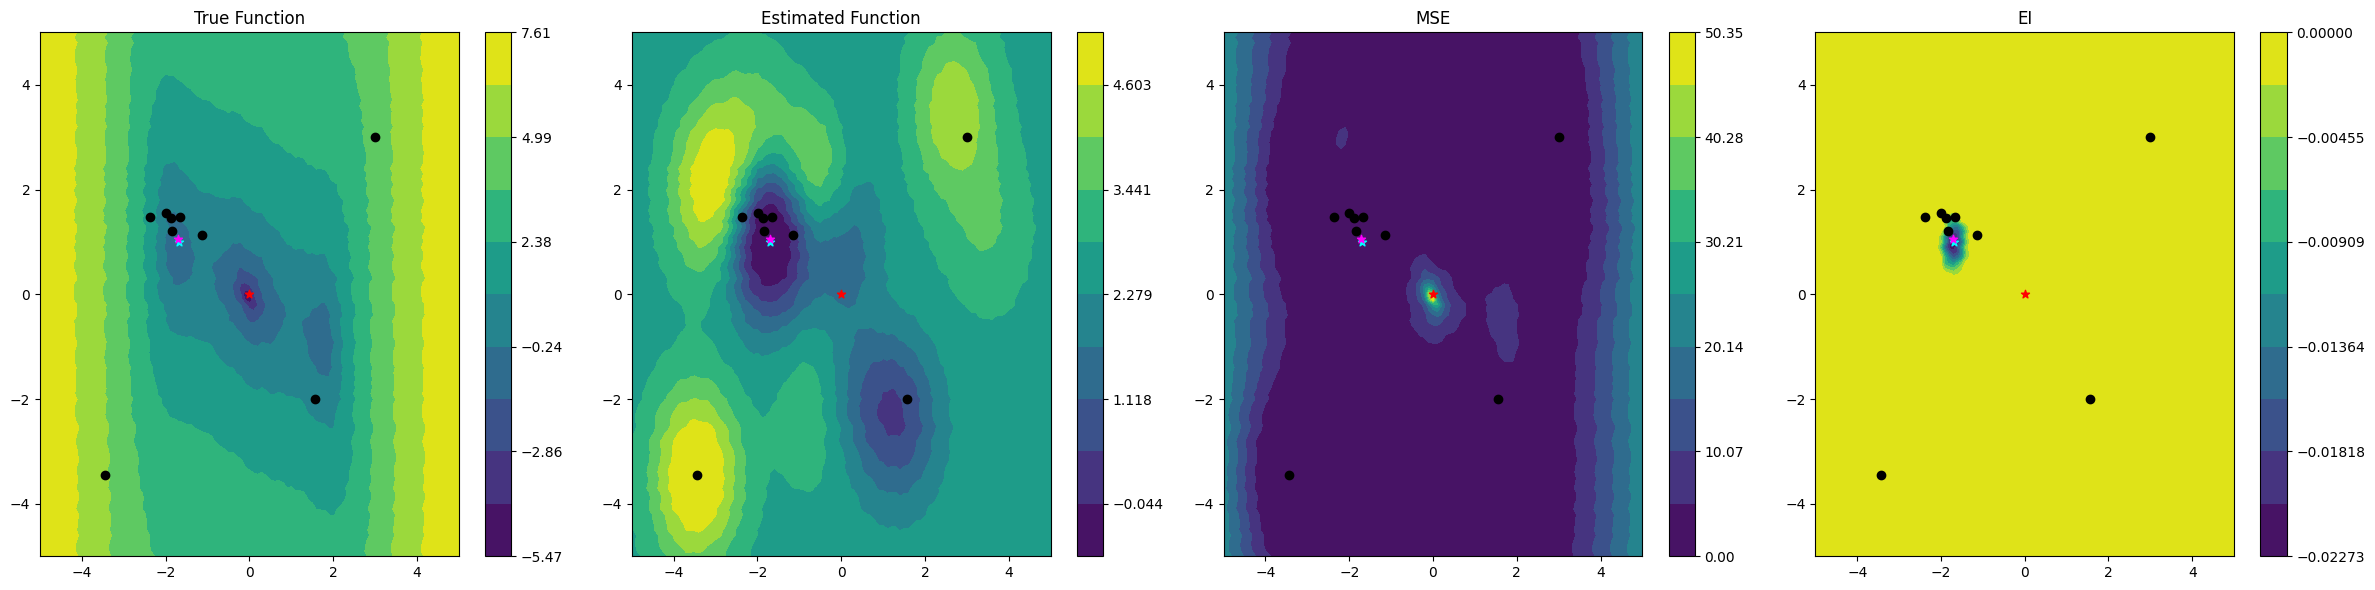

Optimisation error: 17.1166:   6%|▌         | 6/100 [02:21<33:26, 21.35s/it]

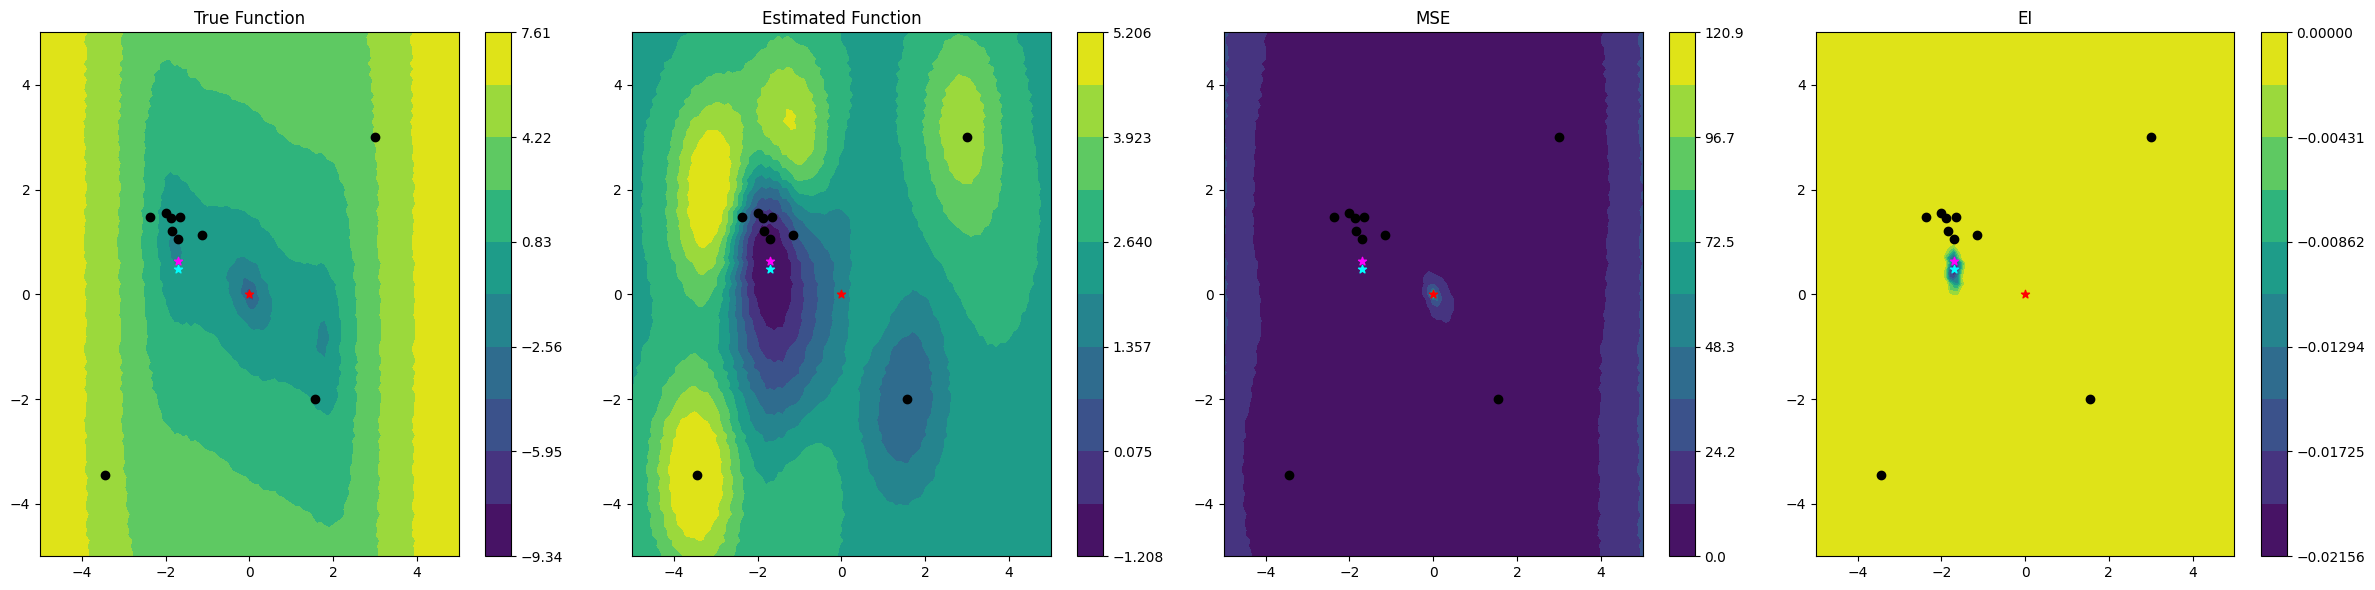

Optimisation error: 17.1166:   7%|▋         | 7/100 [02:44<33:48, 21.81s/it]

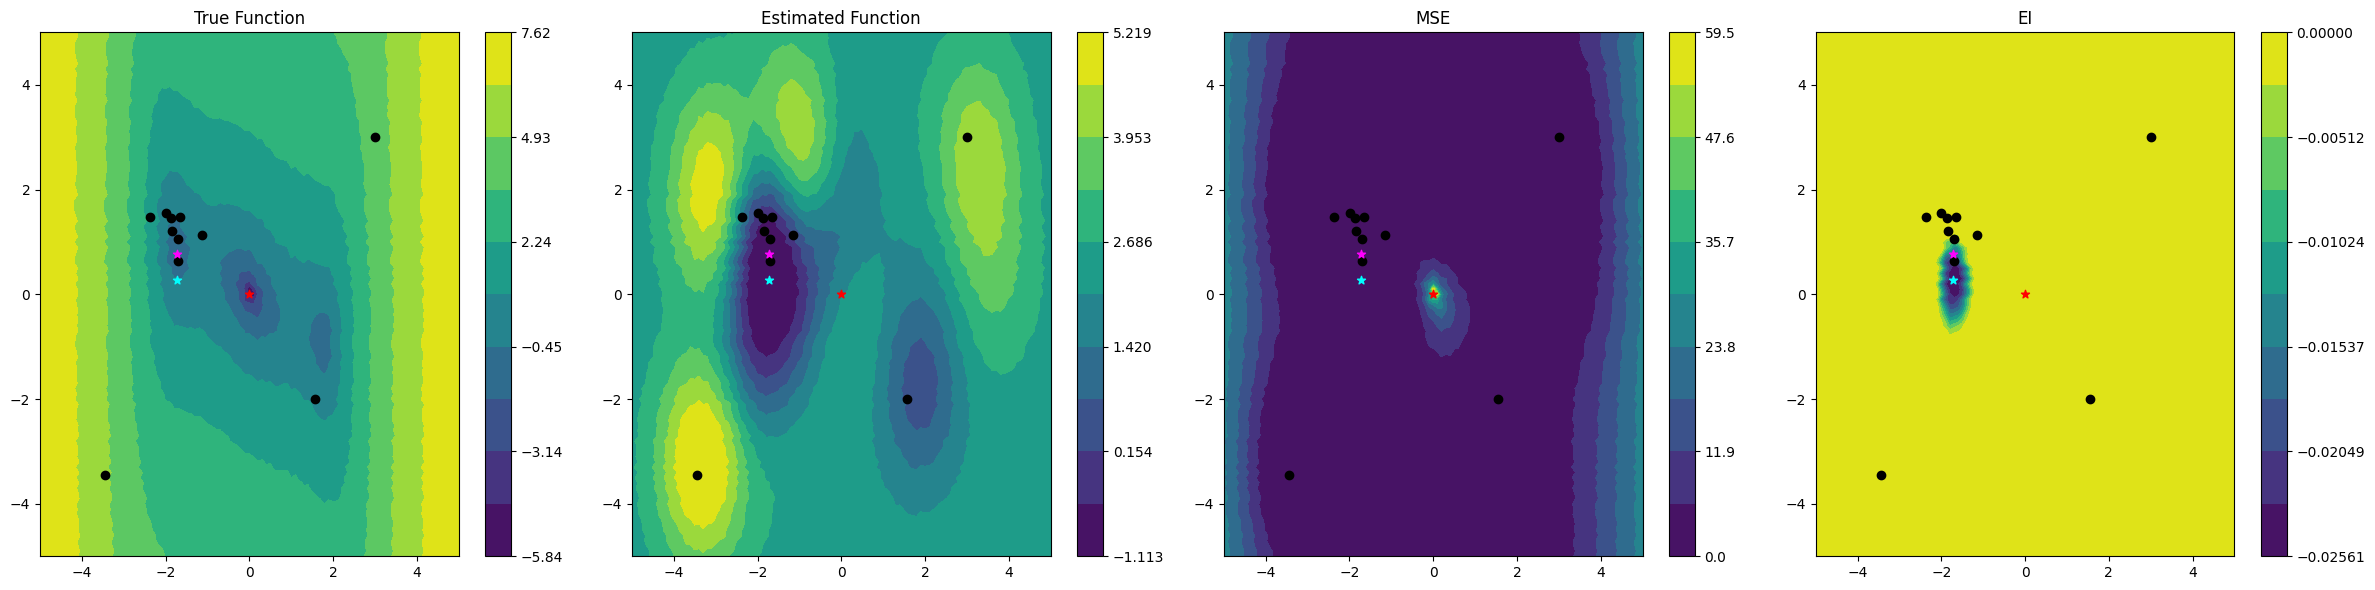

Optimisation error: 17.0833:   8%|▊         | 8/100 [03:03<31:59, 20.87s/it]

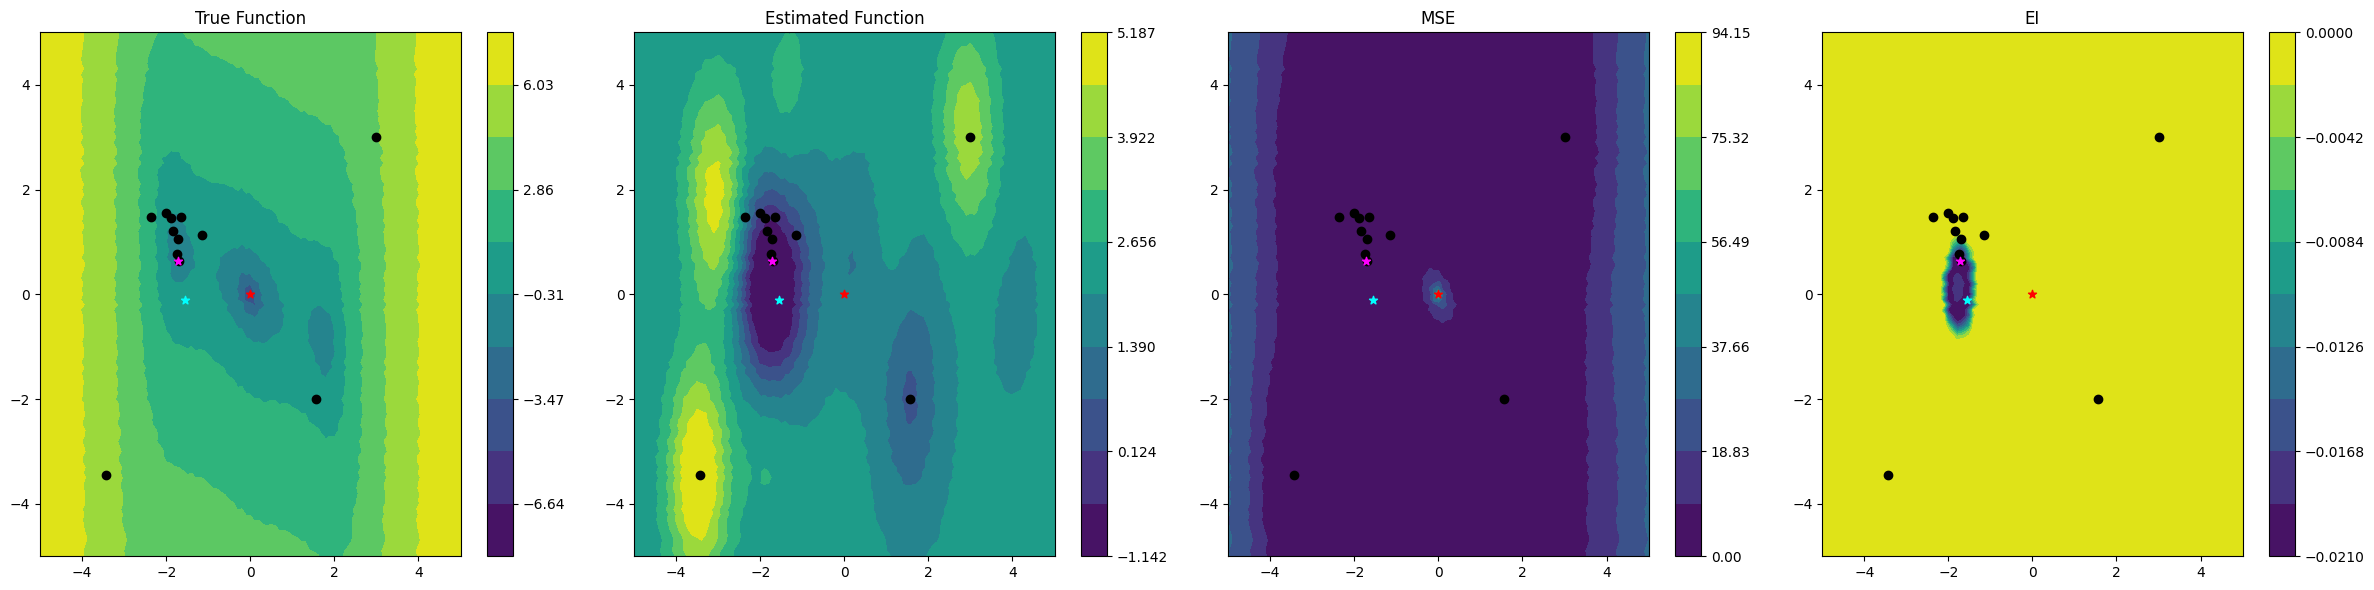

Optimisation error: 17.0552:   9%|▉         | 9/100 [03:22<31:07, 20.52s/it]

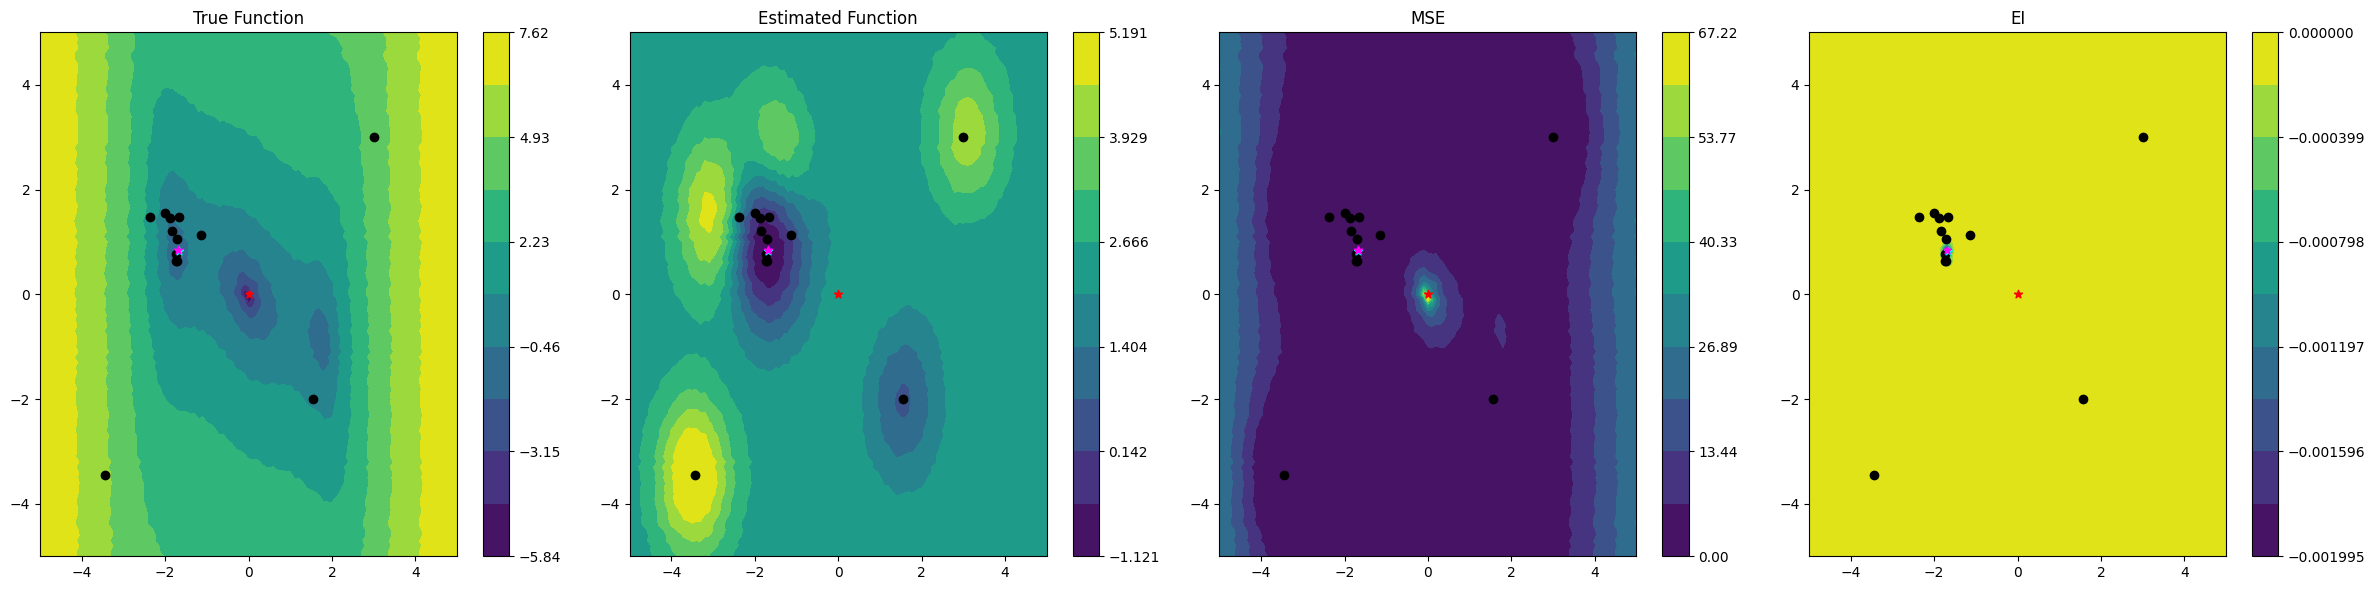

Optimisation error: 17.0552:  10%|█         | 10/100 [03:46<32:05, 21.39s/it]

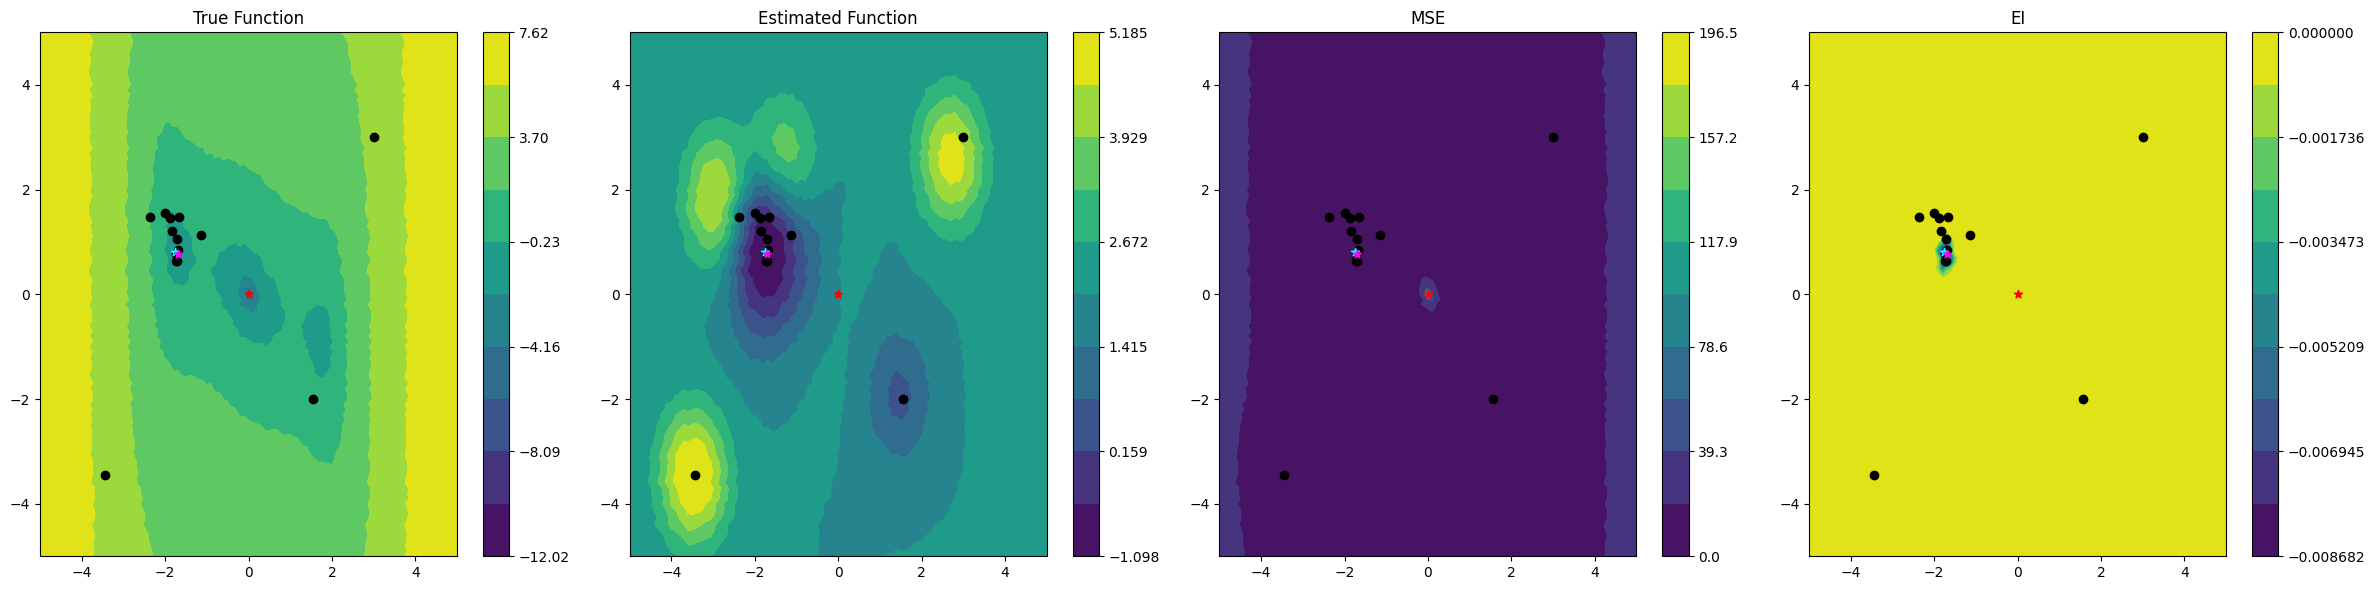

Optimisation error: 17.0552:  11%|█         | 11/100 [04:07<31:42, 21.38s/it]

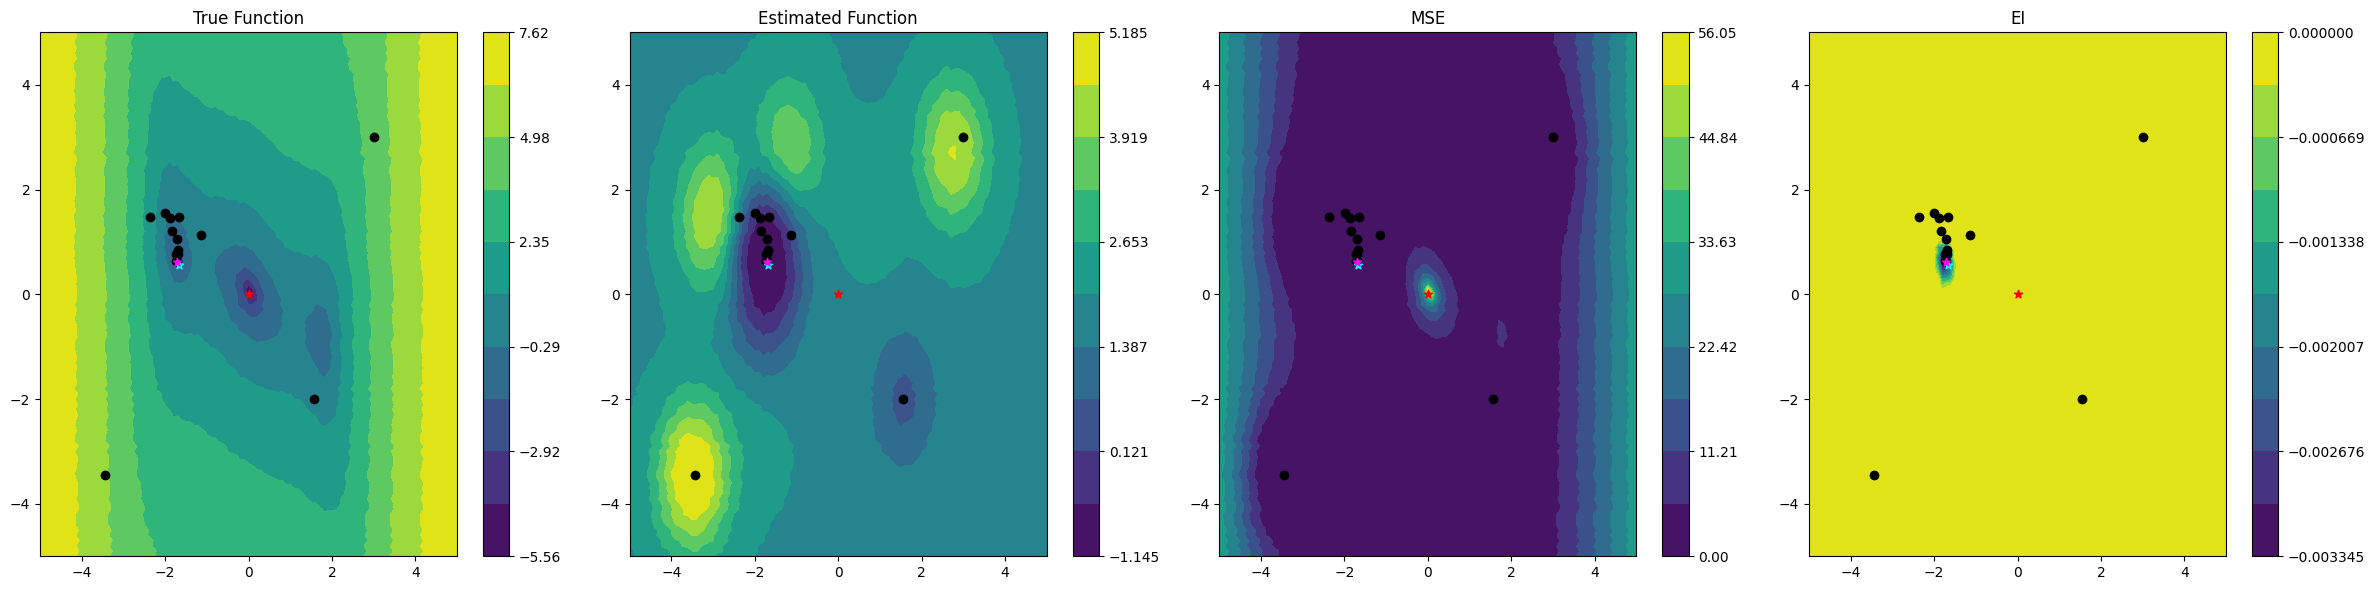

Optimisation error: 17.0552:  12%|█▏        | 12/100 [04:30<31:58, 21.80s/it]

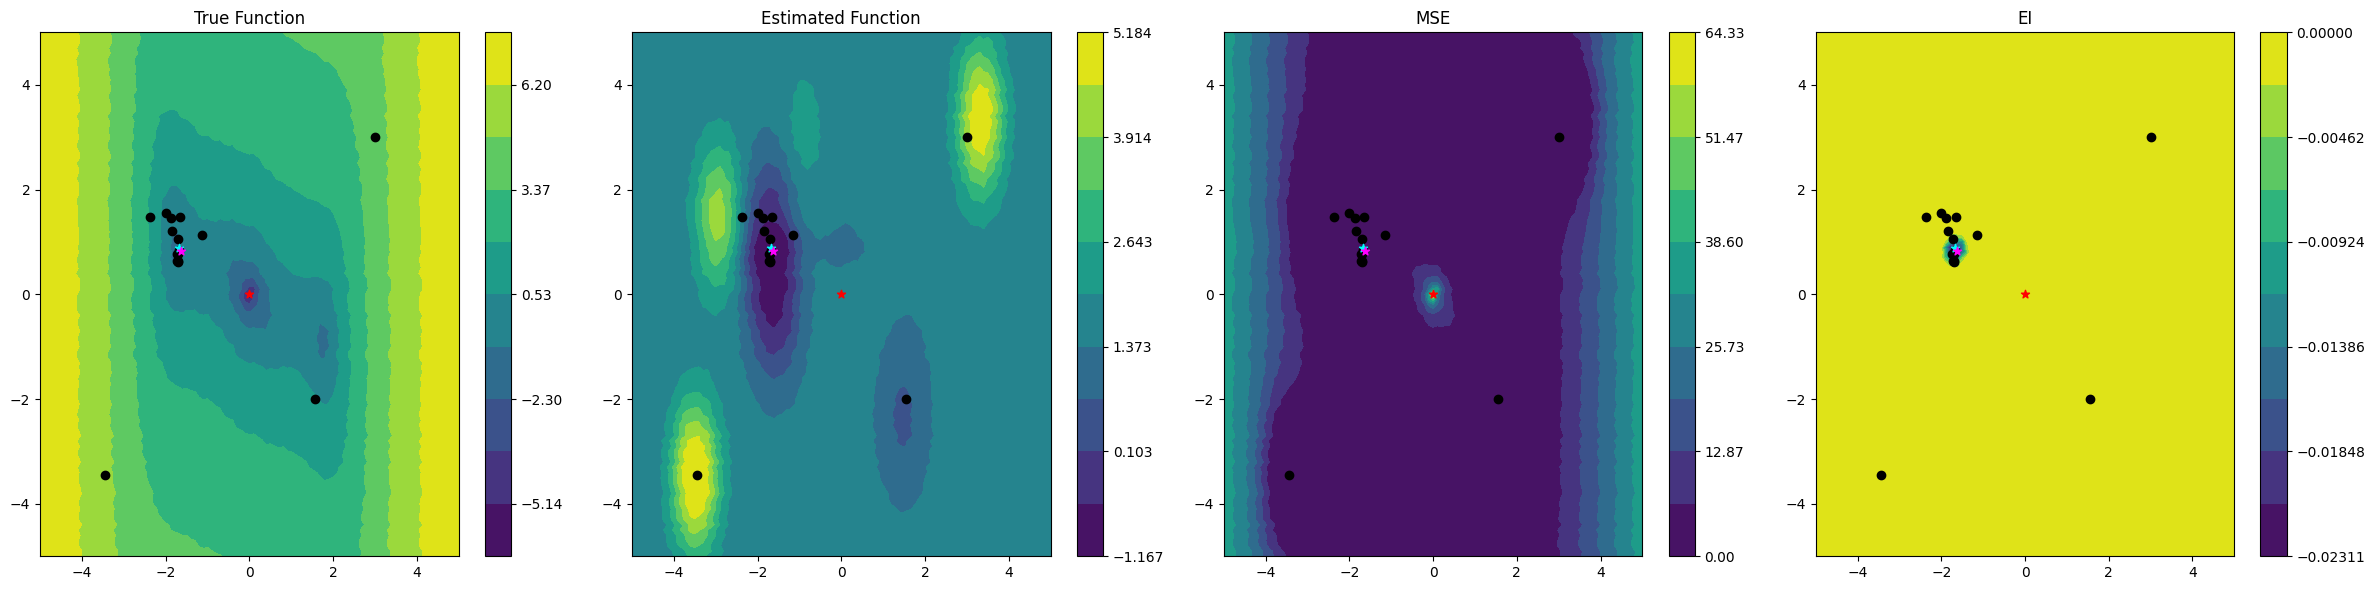

Optimisation error: 17.0552:  13%|█▎        | 13/100 [04:49<30:20, 20.92s/it]

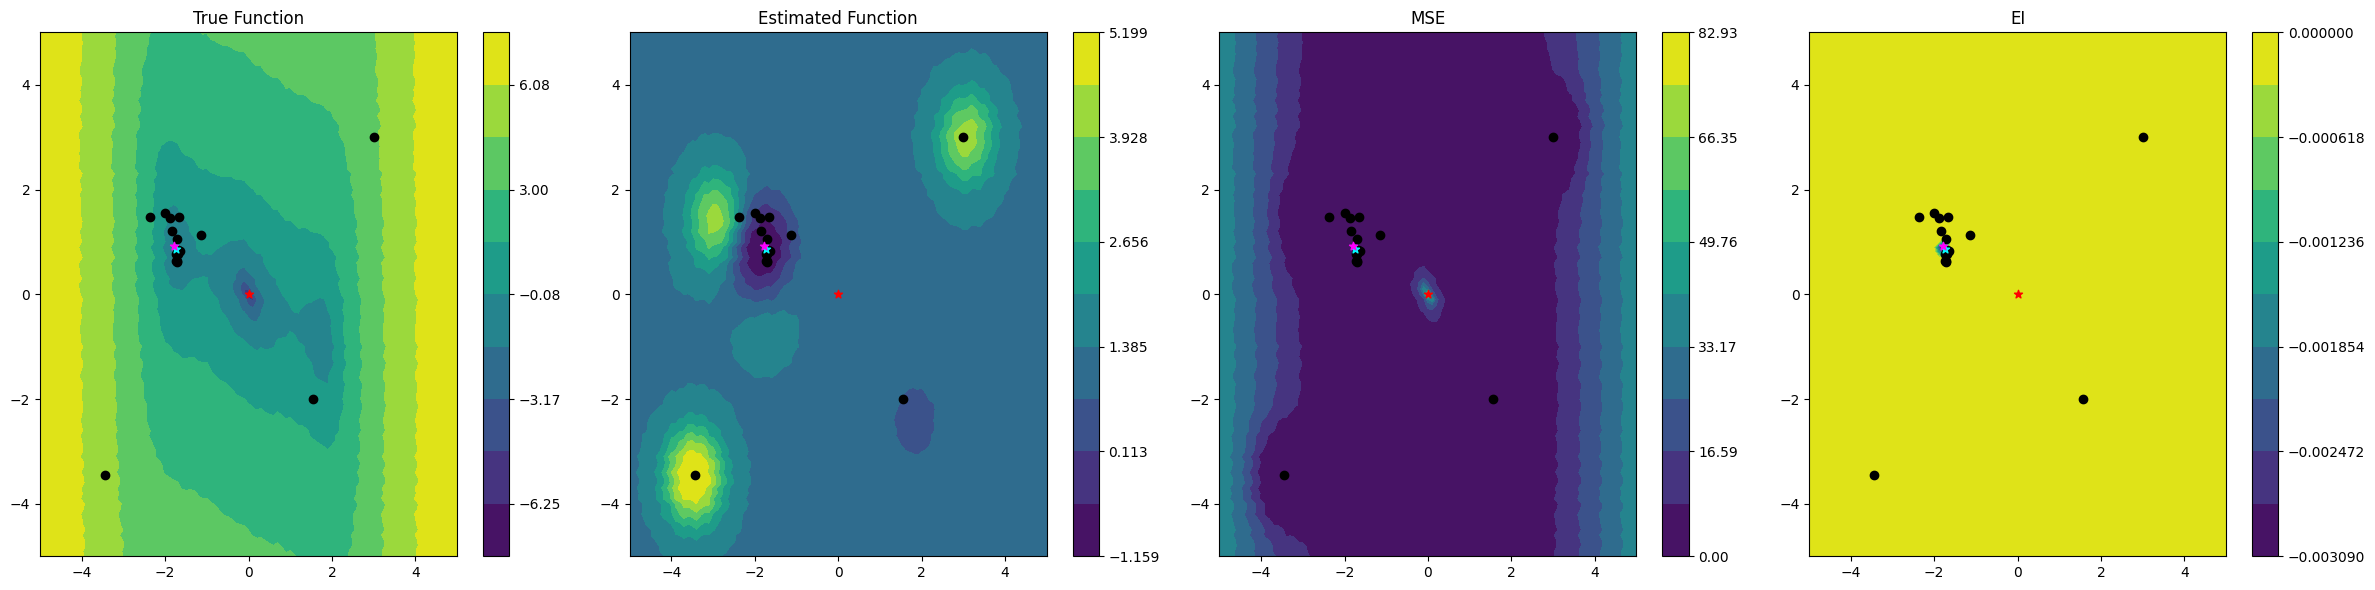

Optimisation error: 17.0385:  14%|█▍        | 14/100 [05:10<30:02, 20.96s/it]

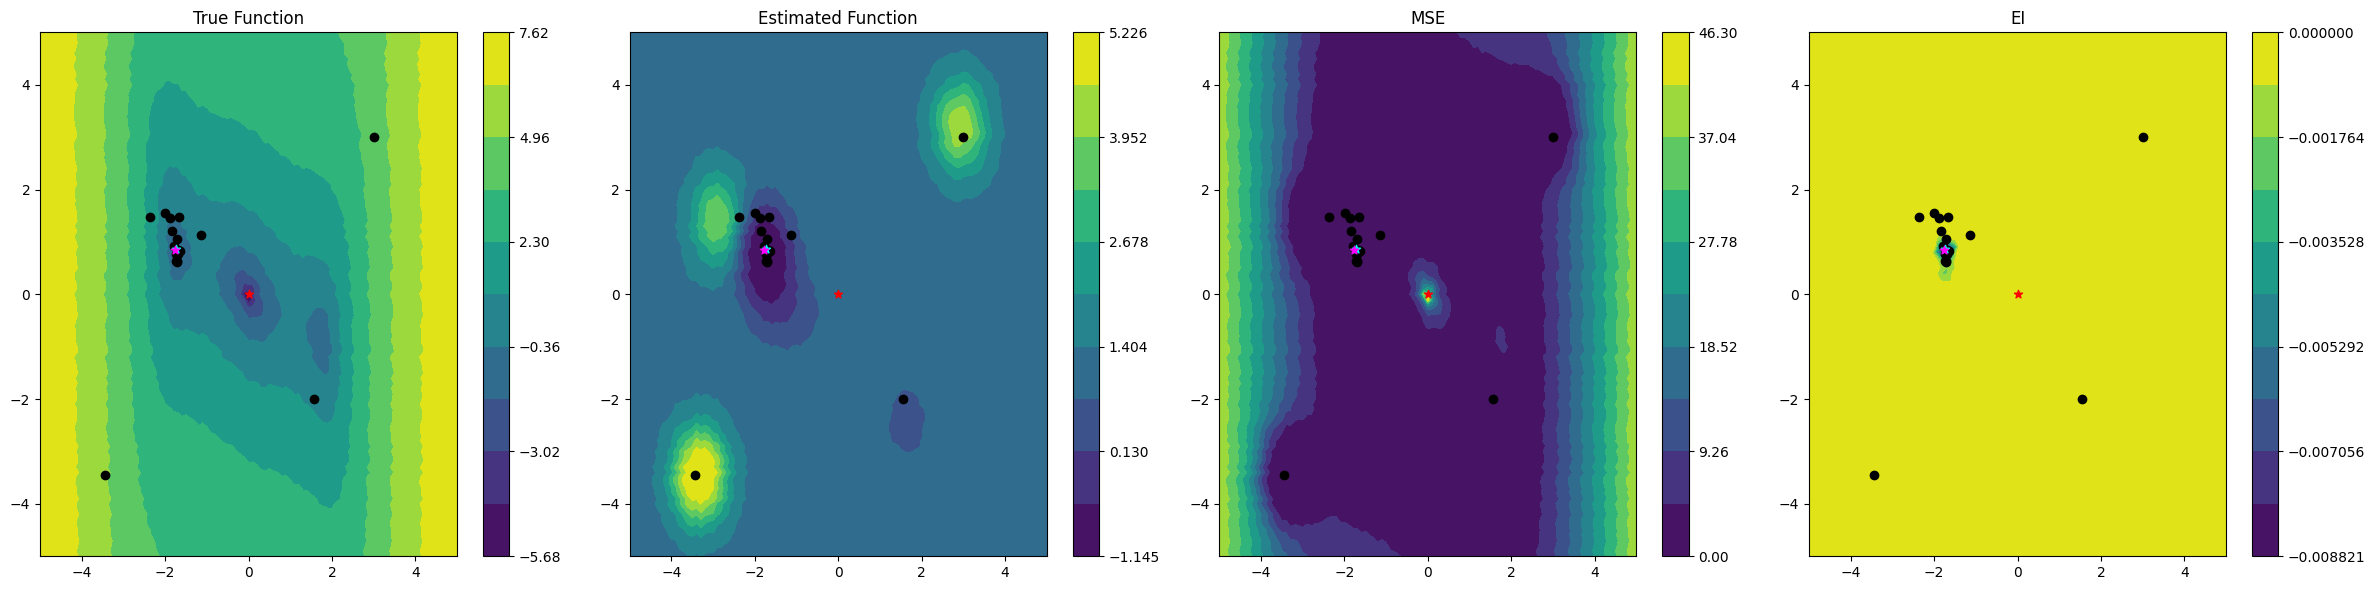

Optimisation error: 17.0385:  15%|█▌        | 15/100 [05:37<31:50, 22.48s/it]


KeyboardInterrupt: 

In [2]:
opt = SurrogateOptimiser(func=f.three_hump_camel(n_obs=10),#22
                        surr=DGP(),
                        acqf=EI(),
                        seed=2,
                        plot_results=True,
                        n_candidates=49)
_ = opt.optimise()
display(opt)